* Bootstrapping
* Bagging
* Boosting

## 1. Bootstrap
In machine learning, the bootstrap method refers to random sampling with replacement. The reason to use the bootstrap method is because it can test the stability of a solution. By using multiple sample data sets and then testing multiple models, it can increase robustness. Perhaps one sample data set has a larger mean than another, or a different standard deviation. This might break a model that was overfit, and not tested using data sets with different variations.

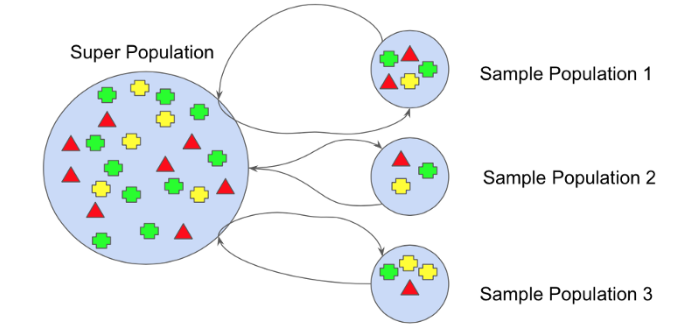

In [1]:
from IPython.display import Image
Image(filename='bootstrap.png')

## 2. Bagging
Idea: pool together multiple trees to get better predictions

Bagging (stands for __B__ootstrap __Agg__regat__ing__) is a way to decrease the variance of your prediction by generating additional data for training from your original dataset using combinations with repetitions to produce multisets of the same cardinality/size as your original data. By increasing the size of your training set you can't improve the model predictive force, but just decrease the variance, narrowly tuning the prediction to expected outcome.

This helps to decrease variance i.e. reduce the overfit.

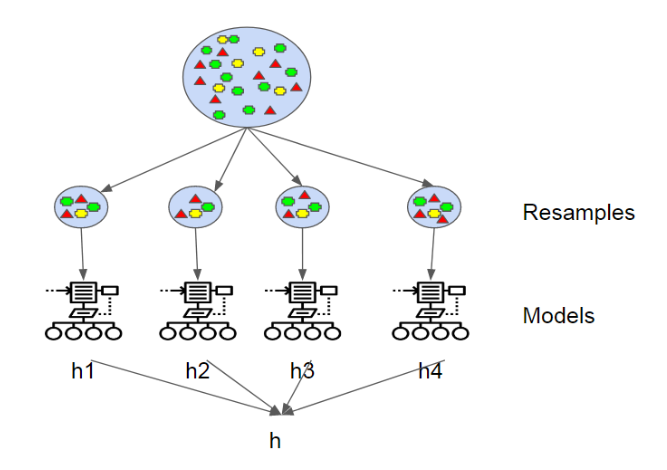

In [2]:
from IPython.display import Image
Image(filename='bagging.png')

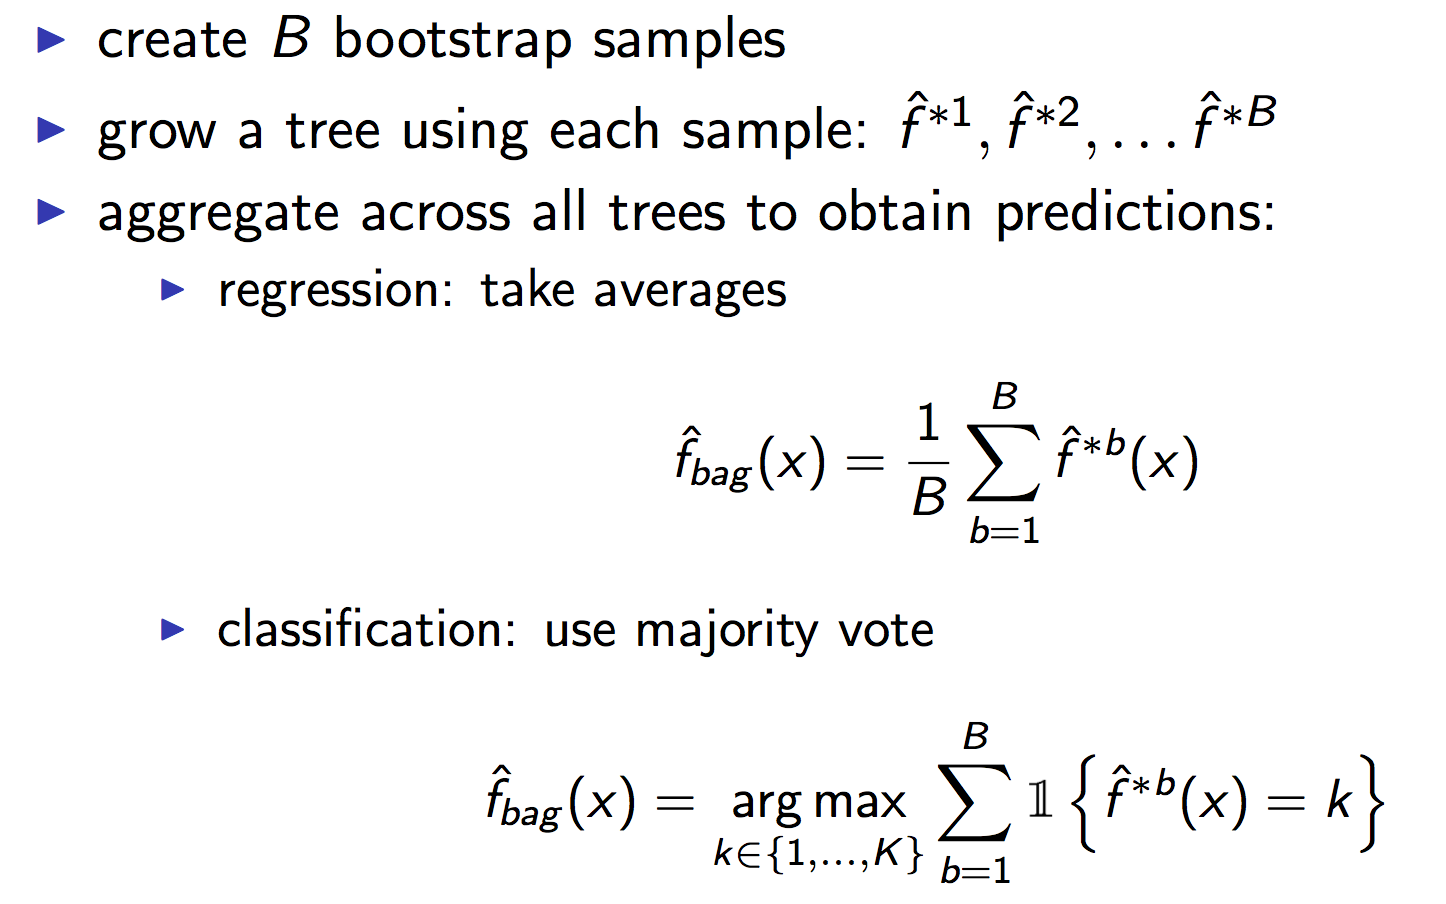

In [1]:
from IPython.display import Image
Image(filename='bagging_tree.png')

## 3. Boosting
Boosting is a technique for combining many weak learners (high bias) into a strong learner (lower bias).

Boosting is a two-step approach, where one first uses subsets of the original data to produce a series of averagely performing models and then "boosts" their performance by combining them together using a particular cost function (=majority vote). Unlike bagging, in the classical boosting the subset creation is not random and depends upon the performance of the previous models: every new subsets contains the elements that were (likely to be) misclassified by previous models.

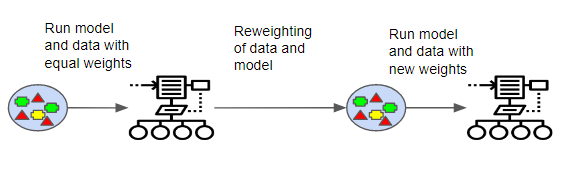

In [3]:
from IPython.display import Image
Image(filename='boosting.png')

** Boosting Regression Trees**:

Idea is to avoid overfitting by learning very slowly. Trees should be small trees.

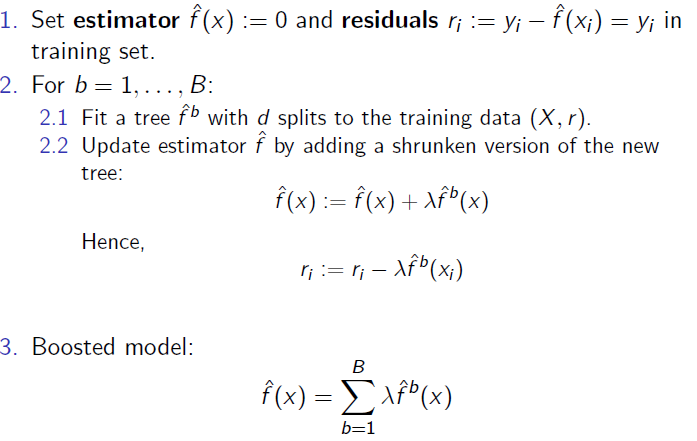

In [2]:
from IPython.display import Image
Image(filename='boosting regression trees.png')

* __AdaBoost__ (Adaptive Boosting)

  * Retrains the algorithm iteratively by choosing the training set based on accuracy of previous training.
  * The weight-age of each trained classifier at any iteration depends on the accuracy achieved.

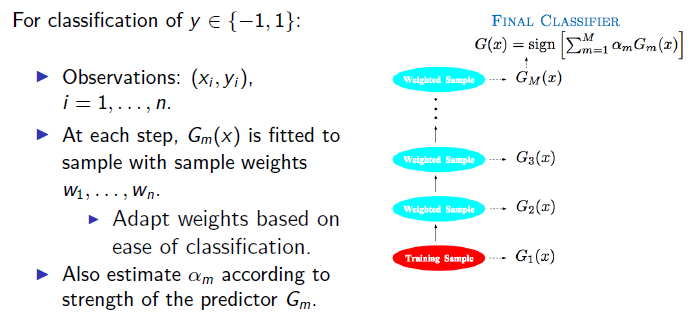

In [3]:
from IPython.display import Image
Image(filename='adaboost.png')

* __Gradient Boosting__

Gradient descent involves updating parameters $\theta_1$; ... ; $\theta_n$ by taking baby steps in the opposite direction of the gradient to find $(\theta_1, ... , \theta_n)$ that minimizes $L(\theta_1, ... , \theta_n)$

For gradient tree boosting,
1. $\theta_i$ is $f(x_i)$.
2. L is a function of the data $y_i$ and the fitted values $f(x_i)$ we want to minimize, e.g. for regression
$$L = \frac{1}{2}\sum(y_i-f(x_i))^2$$
$$ -\frac{\partial L}{\partial f(x_i)}=y_i-f(x_i)$$
3. At each of B iterations, we update $f (x_i)$ by making a small step given by a tree fittted to the components of the negative gradient.

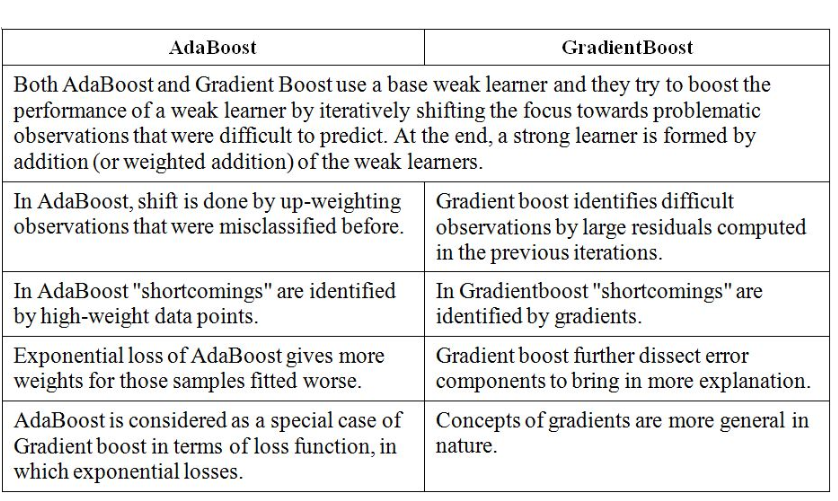

In [1]:
from IPython.display import Image
Image(filename='AdaBoost & GBM.png')

## 4. Stacking
Stacking is a similar to boosting: you also apply several models to your original data. The difference here is, however, that you don't have just an empirical formula for your weight function, rather you introduce a meta-level and use another model/approach to estimate the input together with outputs of every model to estimate the weights or, in other words, to determine what models perform well and what badly given these input data.

## 5. Comparison

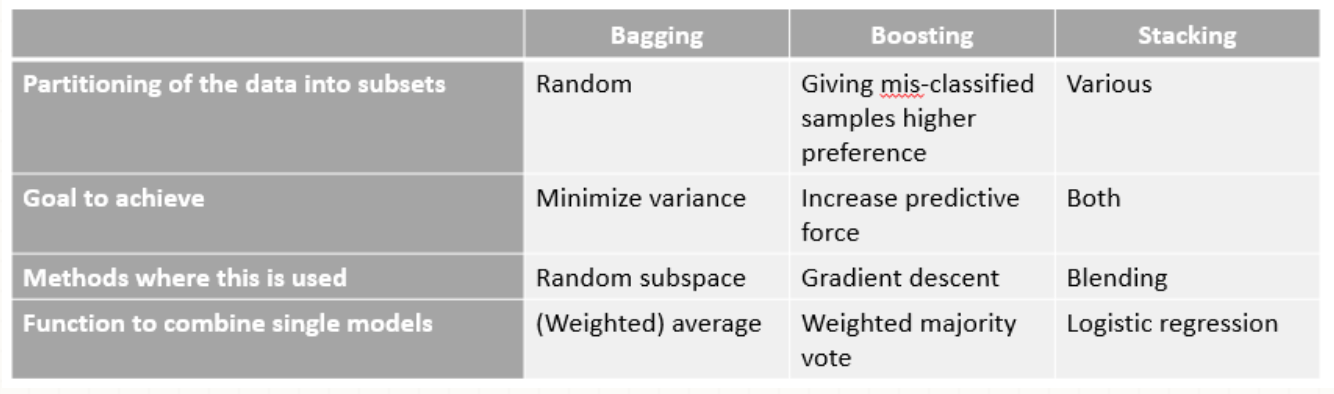

In [1]:
from IPython.display import Image
Image(filename='comparison.png')

## 6. Random Forest
Random forest is an ensemble __bagging__ or averaging method that aims to reduce the variance of individual trees by randomly selecting (and thus de-correlating) many trees from the dataset, and averaging them.

Random forest is a bagging technique and not a boosting technique. In boosting as the name suggests, one is learning from other which in turn boosts the learning.

The trees in random forests are run in __parallel__. There is no interaction between these trees while building the trees. Once all the trees are built, then a voting or average is taken across all the trees' prediction depending on whether the problem is a classification or regression problem.

The trees in boosting algorithms like GBM-Gradient Boosting Machine are trained __sequentially__.Let's say the first tree got trained and it did some predictions on the training data. Not all of these predictions would be correct. Let's say out of a total of 100 predictions, the first tree made mistake for 10 observations. Now these 10 observations would be given more weightage when building the second tree. Notice that the learning of the second tree got boosted from the learning of the first tree. Hence, the term boosting. This way, each of the trees are built sequentially over the learnings from the past trees.

Random Forest won't tend to overfit as more trees are added. It acutally generalise better in the presence of more trees at the expense of training and prediction time. Overfitting often occurs when there are:
* too many free parameters
* too many rounds in boosting
* too many layers in a Neural Net
* too much depth in trees
* too many iterations in sgd-type algorithms

Assuming that the depth of each tree in Random Forest is held constant, Random Forest is simply taking an average over these independent trees. Hence more trees should only reduce overfit/variance in most cases.

## 7. Summary of Tree-Based Methods
* A single tree provides a sequence of interpretable decision rules that can be used to arrive at predictions.
* Prediction accuracy can be improved by using ensemble methods at the cost of interpretability.
* Ensemble methods effectively aggregate predictions from multiple learners (trees).
  * Bagging and random forests take averages over many __deep__ trees.
  * Gradient boosting sums over many __shallow__ trees fit to the negative gradient components.

## 8. XGBoost
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.

1. __Regularization:__
   * Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
   * In fact, XGBoost is also known as ‘regularized boosting‘ technique.
2. __Parallel Processing:__
   * XGBoost implements parallel processing and is blazingly faster as compared to GBM.
   * XGBoost also supports implementation on Hadoop.
3. __High Flexibility__
   * XGBoost allow users to define custom optimization objectives and evaluation criteria.
4. __Handling Missing Values__
   * XGBoost has an in-built routine to handle missing values.
   * User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
5. __Tree Pruning:__
   * A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
   * XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
6. __Built-in Cross-Validation__
   * XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
   * This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
7. __Continue on Existing Model__
   * User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
   * GBM implementation of sklearn also has this feature so they are even on this point.

### Parameters
__General Parameters__

These define the overall functionality of XGBoost.
* booster [default=gbtree]
* silent [default=0]:
* nthread [default to maximum number of threads available if not set]

__Booster Parameters__

Though there are 2 types of boosters, I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

* eta [default=0.3] (learning rate)
* min_child_weight [default=1]
* max_depth [default=6]
* max_leaf_nodes
* gamma [default=0]
* max_delta_step [default=0]
* colsample_bytree [default=1]
* colsample_bylevel [default=1]
* lambda [default=1]
* alpha [default=0]
* scale_pos_weight [default=1]

__Learning Task Parameters__

These parameters are used to define the optimization objective the metric to be calculated at each step.

* objective [default=reg:linear]
* eval_metric [ default according to objective ]
* seed [default=0]


## Reference
- https://medium.com/@SeattleDataGuy/how-to-develop-a-robust-algorithm-c38e08f32201
- https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning
- https://stats.stackexchange.com/questions/77018/is-random-forest-a-boosting-algorithm
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/